Solution of heat equation in 1D: <br>
$$
\frac{du(x,t)}{dt} = \alpha \frac{d^2u(x,t)}{dx^2}
$$

In [1]:
%reset -f

In [2]:
import numpy as np
from scipy import integrate
from scipy import sparse
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})
import time

In [3]:
### parameters ###

dx = 0.005                   # spatial grid spacing
x0 = 0.0  
xf = 10.0
x  = np.arange(x0,xf,dx)     # spatial grid points

dt = 0.005                   # temporal grid spacing
t0 = 0.0
tf = 1.0
t_eval = np.arange(t0,tf,dt) # temporal grid points

figlength = 8
figheight = 8

alpha = 1.0                  # thermal diffusivity
xw    = 1.0                  # width of initial temperature distribution
xc    = 5.0                  # center of initial temperature distribution

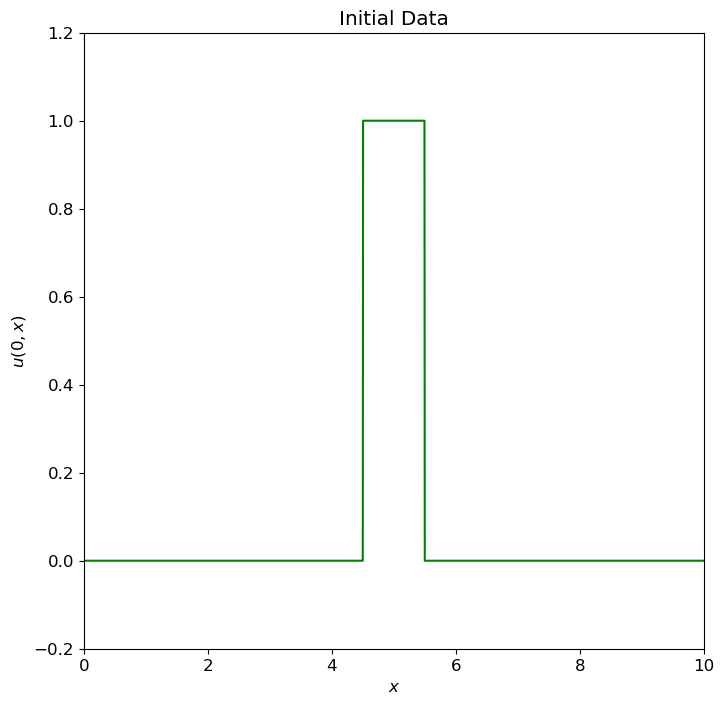

In [4]:
### initial temperature distribution ###

u_init = np.zeros(len(x))
for i in np.arange(0,len(x)):
    if ((x[i] > (xc - 0.5*xw)) and x[i] < (xc + 0.5*xw)):
        u_init[i] = 1.0
        
fig = plt.figure(figsize=(figlength,figheight))
fig.add_subplot(111)
plt.plot(x,u_init,color='g')
plt.xlabel('$x$')
plt.ylabel('$u(0,x)$')
plt.axis([x0,xf,-0.2,1.2])
plt.title('Initial Data')
plt.show()

In [5]:
### define finite difference laplace operator ###

DELSQ = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(len(x), len(x))) / dx**2

In [6]:
### define RHS of heat diffusion equation ###

def dudt(t,u):
    return  alpha * DELSQ.dot(u)

In [7]:
### solve the ivp ###

tinit = time.time()
sol = integrate.solve_ivp(dudt,
                          t_span=[t0, tf],
                          y0=u_init,
                          t_eval=t_eval,
                          method="RK23")
tfinal = time.time()
print("Time for solution = %5.2f seconds" % (tfinal-tinit) ) 

Time for solution = 15.26 seconds


In [8]:
### making the frames of the animation ###
for iframe in np.arange(0,len(sol.t)):

    output_filename = '%d.png' % iframe
    titlestring = "time = %5.3f" % t_eval[iframe]

    u = sol.y[:,iframe]

    fig = plt.figure(figsize=(figlength, figheight))
    fig.add_subplot(111)
    plt.plot(x,u)
    plt.xlabel('$x$')
    plt.ylabel('$u(t,x)$')
    plt.title(titlestring)
    plt.axis([x0,xf,-0.2,1.2])
    plt.savefig(output_filename,format="png")
    plt.close(fig)

In [9]:
### stitching frames together to make animation ###
os.system("rm heateqn.mp4")
os.system("ffmpeg -i %d.png -vf scale=800x800 heateqn.mp4")
os.system("rm *.png") 

rm: cannot remove 'heateqn.mp4': No such file or directory
ffmpeg version 2.8.15 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-36)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --extra-ldflags='-Wl,-z,relro ' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crystalhd --enable-gnutls --enable-ladspa --enable-libass --enable-libcdio --enable-libdc1394 --enable-libfdk-aac --enable-nonfree --disable-indev=jack --enable-libfreetype --enable-libgsm --enable-libmp3lame --enable-openal --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libsp

0